In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's work with a set of data for the classification task. Let's get the data consisting of two informative features (`n_features=2, n_informative=2`) in the amount of 20 pieces (`n_samples=20`) to predict one target variable, which will consist of two classes (`n_classes=2`), through the `make_classification` method.

In [2]:
from sklearn import datasets


X, y = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2
)

X, y

(array([[ 0.24306743, -0.52734094],
        [ 0.96417816, -0.37583852],
        [-1.08486058,  0.00847624],
        [-0.90653761,  3.3851625 ],
        [ 1.33279979,  1.25629151],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 1.39939732,  3.2047161 ],
        [-0.07784592, -0.67730036],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-1.11064538,  0.7571574 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.91390999,  2.05571391],
        [-1.33222706, -0.85982898]]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]))

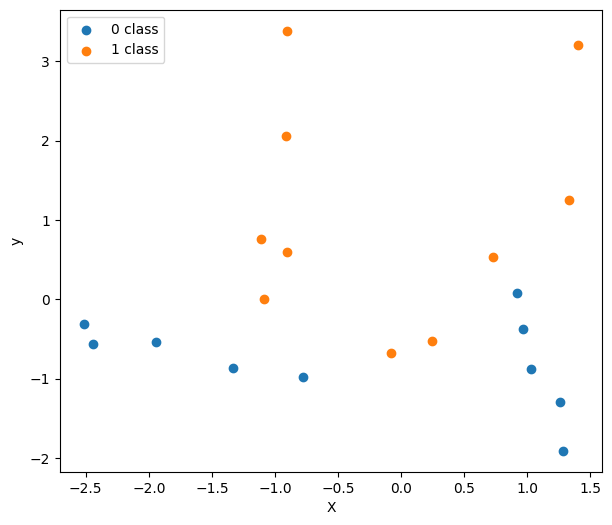

In [3]:
plt.figure(figsize=(7, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 class')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 class')

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

pred = logreg.predict(X)

In [5]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,1,0
1,0,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,0


In the first line should have predicted 1 class, but the model predicted 0, but the next object has no problem, the target label is 0 class, predicted also zero class, we can further look at all objects and compare the truth with the predicted class.   

If we do this, we will know how many times the model answered correctly - this is our first Accuracy metric.

This is the most obvious and simple way to calculate the quality of predictions:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$


The proportion of correct answers can vary from 0 to 1, where 0 is the model never got it right, all its predictions are wrong, and 1 is the model predicted everything perfectly.

In [6]:
pred_df['right'] = pred_df['ground truth'] == pred_df['prediction']
pred_df

,ground truth,prediction,right
0,1,0,False
1,0,0,True
2,1,0,False
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,1,1,True
9,1,0,False


In [7]:
wrong_objects_0_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 0)]
wrong_objects_1_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 1)]

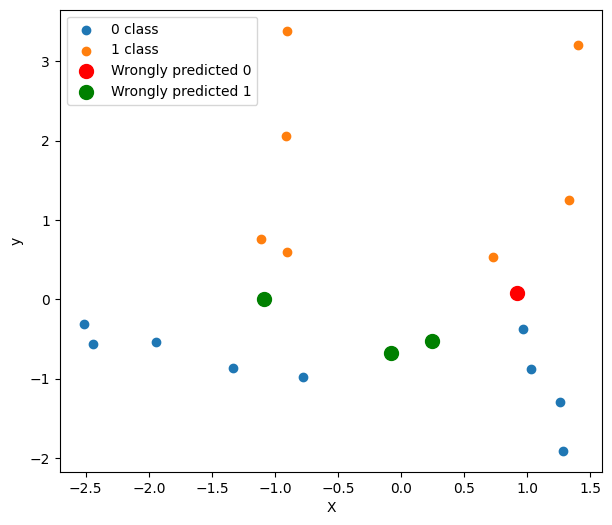

In [8]:
plt.figure(figsize=(7, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 class')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 class')


plt.scatter(wrong_objects_0_class[:, 0], wrong_objects_0_class[:, 1], c='r', label='Wrongly predicted 0', s=100)
plt.scatter(wrong_objects_1_class[:, 0], wrong_objects_1_class[:, 1], c='g', label='Wrongly predicted 1', s=100)

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

In [9]:
pred_df[pred_df['right'] == True].shape[0]
pred_df['right'].sum() / pred_df.shape[0]

0.8

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['ground truth'], pred_df['prediction'])

0.8